In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [34]:
env = pd.read_csv('data\species\environmental_df.csv')
env = env[["ID","Latitude","Longitude","BIO1", "BIO5","BI06", "BIO12","BIO15"]]
env

,ID,Latitude,Longitude,BIO1,BIO5,BI06,BIO12,BIO15
0,31529,-18.286728,143.481247,25.830833,36.812252,12.261750,778.0,118.931313
1,31529,-18.286728,143.481247,25.830833,36.812252,12.261750,778.0,118.931313
2,31529,-18.286728,143.481247,25.830833,36.812252,12.261750,778.0,118.931313
3,31529,-18.286728,143.481247,25.830833,36.812252,12.261750,778.0,118.931313
4,31529,-18.286728,143.481247,25.830833,36.812252,12.261750,778.0,118.931313
...,...,...,...,...,...,...,...,...
271265,145031,12.899637,79.348824,28.194969,38.084751,18.804251,1020.0,76.790619
271266,145031,22.905533,84.214233,23.526134,37.633999,9.562250,1491.0,122.532074
271267,145031,24.600239,72.730560,23.997032,37.051250,9.970500,1013.0,166.995056
271268,145031,18.849600,80.654129,26.365208,39.693748,13.544250,1547.0,135.629791


In [35]:
#can also try 0.5
grid_size = 1.0

# this will indicate the bottom left corner of the grid cell
#e.g. if lat_grid = -76 and lon_grid = -103 then the grid cell will be from -76 to -75 latitude and -103 to -102 longitude
env['Lat_grid'] = (env['Latitude'] // grid_size) * grid_size
env['Lon_grid'] = (env['Longitude'] // grid_size) * grid_size

# Group by grid cells and aggregate BIO columns with the mean

#can also try median
aggregated_env = env.groupby(['Lat_grid', 'Lon_grid']).agg({
    'BIO1': 'mean',
    'BIO5': 'mean',
    'BI06': 'mean',
    'BIO12': 'mean',
    'BIO15': 'mean'
}).reset_index()

aggregated_env['Grid_ID'] = aggregated_env.groupby(['Lat_grid', 'Lon_grid']).ngroup()
# Each unique pair of Lat_grid and Lon_grid corresponds to a specific area (or "square") on the map
#we have in total 6560 regions in our dataset 
aggregated_env

,Lat_grid,Lon_grid,BIO1,BIO5,BI06,BIO12,BIO15,Grid_ID
0,-76.0,-103.0,-13.720437,-1.207500,-24.105499,790.000000,50.183361,0
1,-76.0,-1.0,-32.551624,-15.046000,-43.903500,83.000000,110.836205,1
2,-68.0,-69.0,-4.754167,3.131250,-14.678750,381.000000,48.193386,2
3,-67.0,162.0,-8.167043,1.341468,-16.777189,488.666667,44.937639,3
4,-66.0,-67.0,-3.187500,3.333333,-12.133333,672.000000,26.278549,4
...,...,...,...,...,...,...,...,...
6555,70.0,74.0,-10.577812,11.106750,-30.920250,274.000000,35.005699,6555
6556,71.0,-158.0,-11.632987,10.300000,-30.897444,115.000000,81.526924,6556
6557,71.0,-157.0,-11.863454,9.483358,-30.705883,110.666667,84.030350,6557
6558,72.0,105.0,-13.858052,13.624250,-37.727001,232.000000,42.942741,6558


c:\Users\annie\anaconda3\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\annie\anaconda3\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\annie\anaconda3\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\annie\anaconda3\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 1

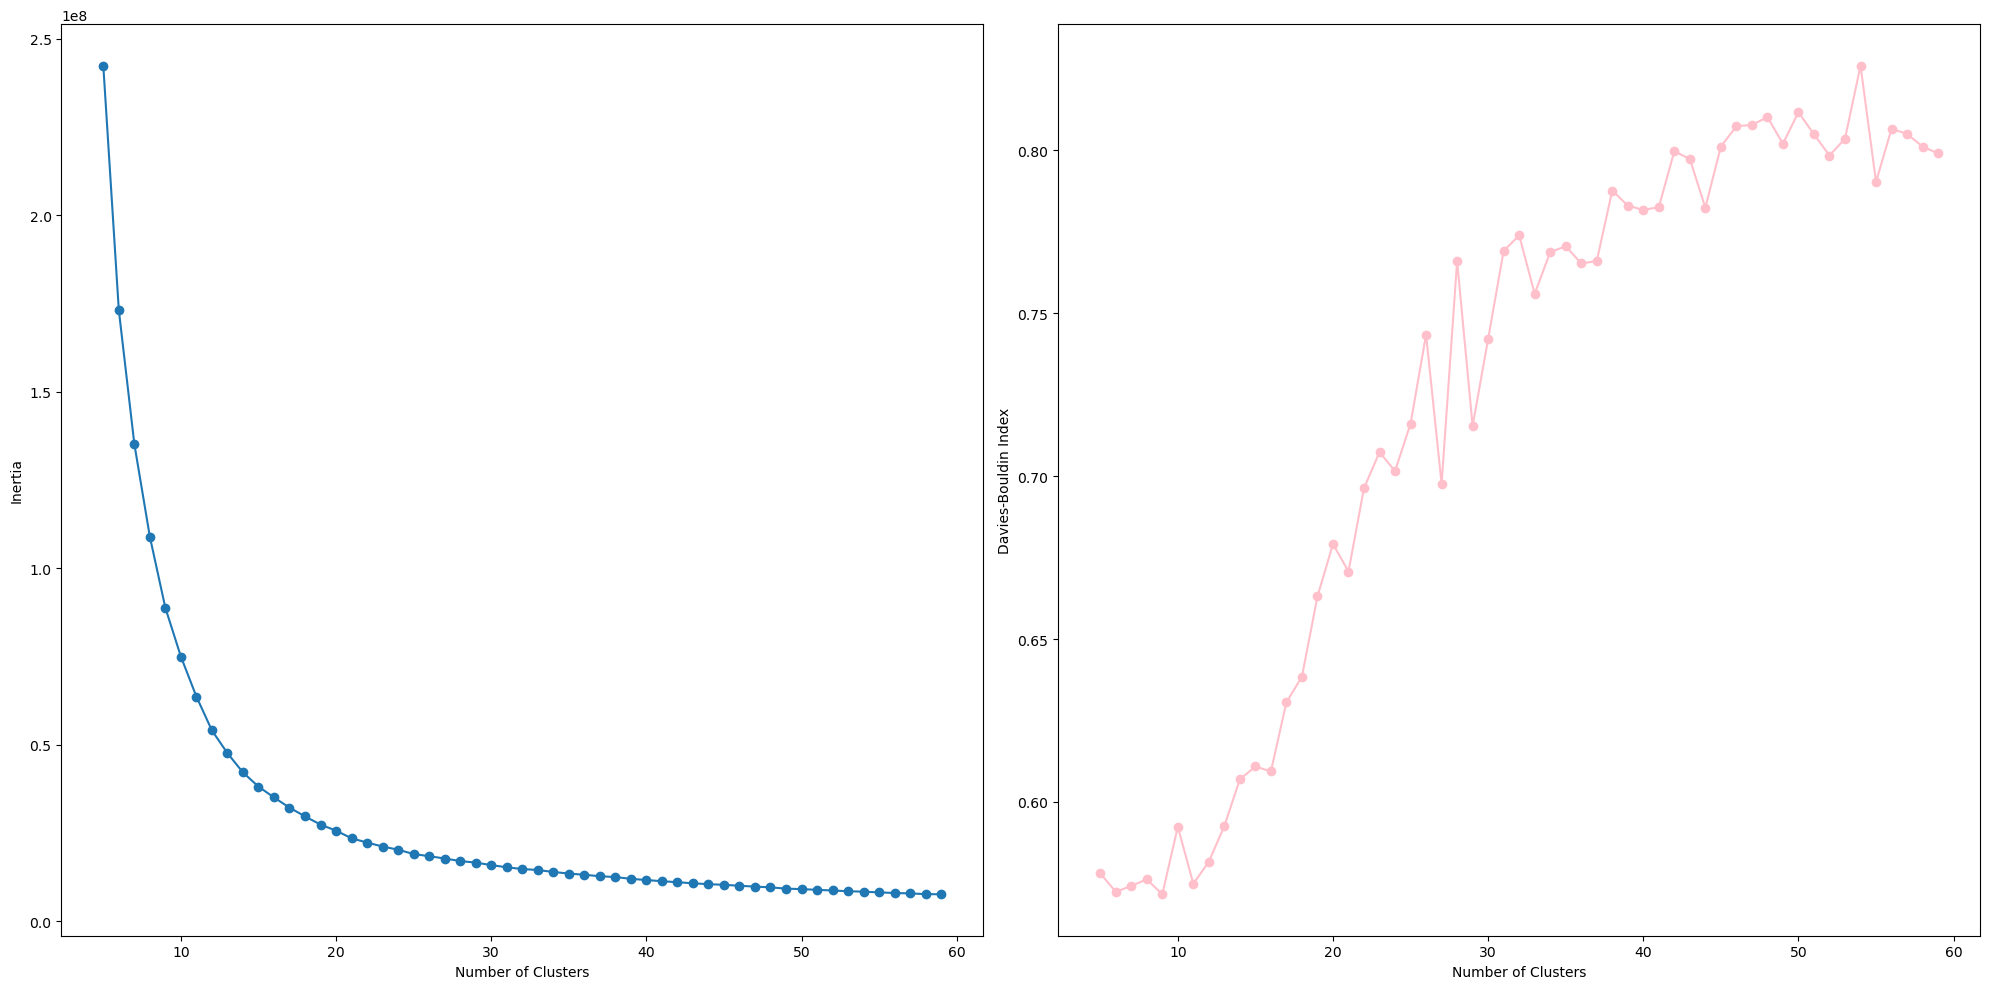

In [5]:
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score


bio_features = aggregated_env[['BIO1', 'BIO5', 'BI06', 'BIO12', 'BIO15']]

cluster_range = range(5, 60)

inertia = []
dbi_scores = []

for n_clusters in cluster_range:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(bio_features)
    inertia.append(kmeans.inertia_)
    dbi_scores.append(davies_bouldin_score(bio_features, kmeans.labels_))

# Plot Inertia and Davies-Bouldin Index in a 2x1 grid
fig, axes = plt.subplots(1, 2, figsize=(20, 10))

# Inertia plot
axes[0].plot(cluster_range, inertia, marker='o', label='Inertia')
axes[0].set_xlabel('Number of Clusters')
axes[0].set_ylabel('Inertia')

# DBI plot
axes[1].plot(cluster_range, dbi_scores, marker='o', color='pink', label='Davies-Bouldin Index')
axes[1].set_xlabel('Number of Clusters')
axes[1].set_ylabel('Davies-Bouldin Index')

plt.tight_layout()
plt.show()

#elbow looks like 12? also dbi is minimum there

In [36]:
#run
# a little bit not symmetric number of clusters
kmeans = KMeans(n_clusters=16, random_state=42)
aggregated_env["Cluster"]=kmeans.fit_predict(bio_features)

print(aggregated_env["Cluster"].value_counts())

cluster_stats = aggregated_env.groupby('Cluster').agg(
    BIO1_mean=('BIO1', 'mean'), BIO1_sd=('BIO1', 'std'),
    BIO5_mean=('BIO5', 'mean'), BIO5_sd=('BIO5', 'std'),
    BIO6_mean=('BI06', 'mean'), BIO6_sd=('BI06', 'std'),
    BIO12_mean=('BIO12', 'mean'), BIO12_sd=('BIO12', 'std'),
    BIO15_mean=('BIO15', 'mean'), BIO15_sd=('BIO15', 'std')
).reset_index()

print(cluster_stats)

# example : Cluster 0 represents regions with moderate annual temperatures (mean of 13.43°C) and warm summers (mean max temperature of 27.29°C). 
# These areas experience moderate rainfall (mean annual precipitation of 811.80 mm) and a slight seasonal variation in temperature and precipitation.

c:\Users\annie\anaconda3\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Cluster
7     986
12    882
2     806
0     733
10    636
3     564
5     416
14    410
9     317
13    217
11    188
1     173
8     133
6      71
4      24
15      4
Name: count, dtype: int64
    Cluster  BIO1_mean    BIO1_sd  BIO5_mean   BIO5_sd  BIO6_mean    BIO6_sd  \
0         0  13.434646   8.515012  27.289438  6.902609  -0.206409  11.582184   
1         1  22.582779   6.104558  29.866510  4.947867  15.339914   7.722973   
2         2  12.372067   9.894806  30.185800  6.880079  -4.685854  13.248068   
3         3  17.557255   7.267251  29.529833  5.319875   5.379932  10.229219   
4         4  25.278493   3.495165  31.041647  3.090565  19.355179   4.642733   
5         5  19.500348   6.102077  29.858896  4.943430   8.741380   8.283185   
6         6  23.990596   4.766100  29.860253  3.693811  18.199765   6.009923   
7         7  10.059019   8.164943  25.639476  6.280784  -4.755789  10.732430   
8         8  23.793318   5.280714  29.919489  4.452574  18.033211   6.302634   
9     

In [ ]:
## significant difference in BIO1, BIO5, BIO6, BIO12, BIO15 between clusters


In [44]:
final = env.merge(aggregated_env[['Lat_grid', 'Lon_grid', 'Grid_ID', 'Cluster']], on=['Lat_grid', 'Lon_grid'], how='left')
print(final.columns)
final = final[['ID', 'Latitude', 'Longitude', 'Lat_grid', 'Lon_grid', 'Grid_ID', 'Cluster']]

# Rename columns for clarity (if needed)
#final = final.rename(columns={'Grid_ID_x': 'Grid_ID', 'Cluster_x': 'Cluster'})

final["UniqueID"] = final["Grid_ID"].astype(str) + "_" + final["Cluster"].astype(str)
final
#final.to_csv('data\species\df_final.csv', index=False)

Index(['ID', 'Latitude', 'Longitude', 'BIO1', 'BIO5', 'BI06', 'BIO12', 'BIO15',
       'Lat_grid', 'Lon_grid', 'Grid_ID', 'Cluster'],
      dtype='object')


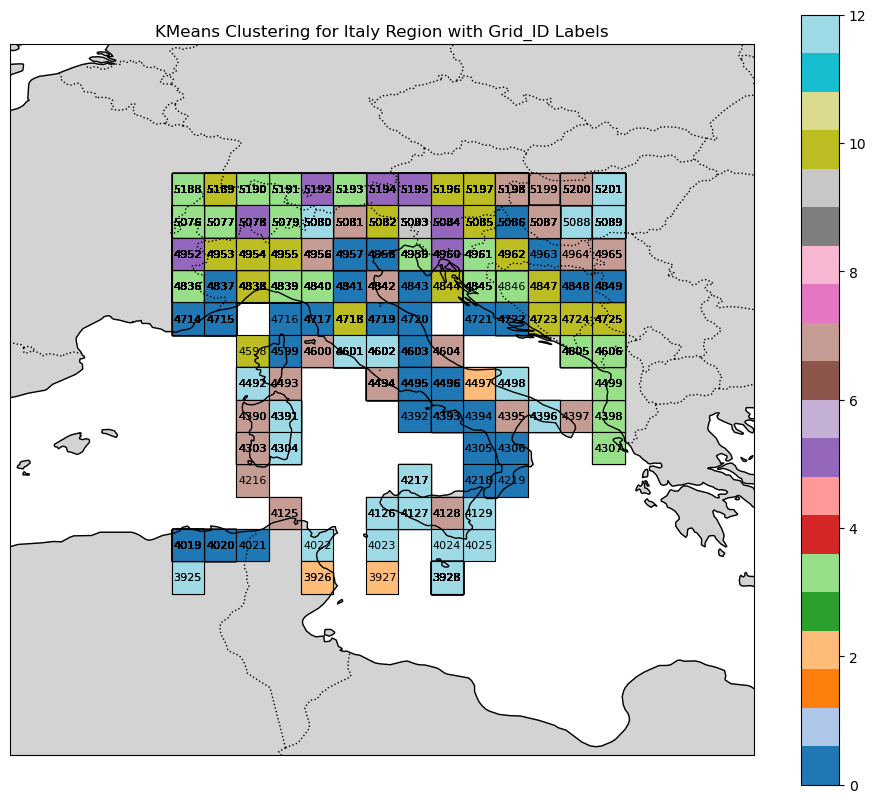

In [46]:
import geopandas as gpd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from shapely.geometry import Polygon

# Assuming `final` DataFrame is available and has 'Lat_grid', 'Lon_grid', 'Cluster', and 'Grid_ID'

# Define Italy's approximate latitude and longitude range
italy_min_lat, italy_max_lat = 35.0, 47.0   # Latitude range for Italy
italy_min_lon, italy_max_lon = 6.0, 19.0    # Longitude range for Italy

# Filter the final DataFrame for Italy's region
italy_region = final[
    (final['Lat_grid'] >= italy_min_lat) & 
    (final['Lat_grid'] <= italy_max_lat) &
    (final['Lon_grid'] >= italy_min_lon) & 
    (final['Lon_grid'] <= italy_max_lon)
].copy()

# Convert grid cells to polygons for plotting
def create_square(lat, lon, size=1.0):
    """Create a square polygon for a grid cell starting at (lat, lon) with a specified size."""
    return Polygon([(lon, lat), (lon + size, lat), (lon + size, lat + size), (lon, lat + size)])

# Apply function to create geometry column
italy_region['geometry'] = italy_region.apply(lambda row: create_square(row['Lat_grid'], row['Lon_grid']), axis=1)

# Create a GeoDataFrame for Italy
gdf_italy = gpd.GeoDataFrame(italy_region, geometry='geometry')

# Plot the clusters on a map with Cartopy
fig, ax = plt.subplots(1, 1, figsize=(12, 10), subplot_kw={'projection': ccrs.PlateCarree()})
ax.set_extent([italy_min_lon - 5, italy_max_lon + 5, italy_min_lat - 5, italy_max_lat + 5], crs=ccrs.PlateCarree())

# Add land and borders for context
ax.add_feature(cfeature.LAND, color='lightgrey')
ax.add_feature(cfeature.BORDERS, linestyle=':', edgecolor='black')
ax.add_feature(cfeature.COASTLINE, edgecolor='black')

# Plot the Italy region clusters
gdf_italy.plot(column='Cluster', cmap='tab20', linewidth=0.8, ax=ax, edgecolor='black', legend=True)

# Annotate each grid cell with its Grid_ID
for idx, row in gdf_italy.iterrows():
    plt.text(row.geometry.centroid.x, row.geometry.centroid.y, str(row['Grid_ID']), 
             ha='center', va='center', fontsize=8, color='black')

# Customize plot
ax.set_title("KMeans Clustering for Italy Region with Grid_ID Labels")
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")

plt.show()